**Análisis de Encuestas**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('peopleware_agr.csv', sep=';',encoding='utf-8') 

In [ ]:
data.head(6)

Marca_temporal  Puntuación Nacionalidad  \
0  2022-10-04 22:08:01.0000000         NaN   Colombiana   
1  2022-10-05 09:27:13.0000000         NaN   Colombiana   
2  2022-10-05 09:29:45.0000000         NaN   Colombiana   
3  2022-10-05 09:40:25.0000000         NaN   Colombiana   
4  2022-10-05 09:41:01.0000000         NaN   Colombiana   
5  2022-10-05 09:45:10.0000000         NaN   Colombiana   

           Modalidad_de_trabajo Departamento_de_residencia     Género  \
0  Híbrida (Virtual+Presencial)                     Bogotá  Masculino   
1                       Virtual                     Bogotá  Masculino   
2                       Virtual                     Nariño   Femenino   
3                       Virtual                     Nariño  Masculino   
4                       Virtual                     Bogotá   Femenino   
5                       Virtual                     Bogotá  Masculino   

   Edad_en_años Rol_principal_actual_en_la_organización  \
0            29                  Diseñador o arquitecto   
1            46                                Analista   
2            43                            Documentador   
3            39               Administrador de proyecto   
4            30                             Programador   
5            31               Administrador de proyecto   

  Años_de_experiencia_en_desarrollo_de_software  \
0                                 De 3 a 7 años   
1                             Superior a 7 años   
2                                 De 1 a 3 años   
3                             Superior a 7 años   
4                                 De 3 a 7 años   
5                             Superior a 7 años   

  Años_de_experiencia_en_la_organización_actual  ... 18 19  20  21  \
0                                Menos de 1 año  ...  4  1   2   2   
1                             Superior a 7 años  ...  3  3   3   3   
2                             Superior a 7 años  ...  3  3   3   3   
3                                 De 1 a 3 años  ...  4  4   4   4   
4                                 De 1 a 3 años  ...  4  3   3   3   
5                                 De 1 a 3 años  ...  3  3   3   3   

   Trabajo en equipo  Comunicación  Igualdad  Condición física  Liderazgo  \
0                  3             2         3                 3          3   
1                  3             3         3                 3          3   
2                  3             3         3                 3          3   
3                  4             3         4                 4          3   
4                  3             3         4                 4          4   
5                  3             3         3                 4          4   

   Motivación  
0           3  
1           3  
2           3  
3           4  
4           4  
5           4  

[6 rows x 39 columns]

In [ ]:
data.Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como

0      Discutidos
1        Exitosos
2        Exitosos
3        Exitosos
4      Discutidos
          ...    
119      Exitosos
120      Exitosos
121      Exitosos
122    Discutidos
123      Exitosos
Name: Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como, Length: 124, dtype: object

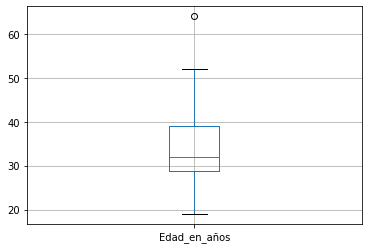

In [ ]:
boxplot = data.boxplot(column=['Edad_en_años'])  

In [ ]:
data.describe()

Puntuación  Edad_en_años           1           2           3  \
count         0.0    124.000000  124.000000  124.000000  124.000000   
mean          NaN     34.008065    3.225806    3.395161    3.427419   
std           NaN      7.339055    0.567962    0.595628    0.626948   
min           NaN     19.000000    2.000000    2.000000    1.000000   
25%           NaN     28.750000    3.000000    3.000000    3.000000   
50%           NaN     32.000000    3.000000    3.000000    3.000000   
75%           NaN     39.000000    4.000000    4.000000    4.000000   
max           NaN     64.000000    4.000000    4.000000    4.000000   

                4           5           6           7           8  ...  \
count  124.000000  124.000000  124.000000  124.000000  124.000000  ...   
mean     3.483871    3.483871    2.879032    3.153226    3.346774  ...   
std      0.604642    0.577123    0.906998    0.733012    0.612131  ...   
min      1.000000    2.000000    1.000000    1.000000    2.000000  ...   
25%      3.000000    3.000000    2.000000    3.000000    3.000000  ...   
50%      4.000000    4.000000    3.000000    3.000000    3.000000  ...   
75%      4.000000    4.000000    4.000000    4.000000    4.000000  ...   
max      4.000000    4.000000    4.000000    4.000000    4.000000  ...   

               18          19          20          21  Trabajo en equipo  \
count  124.000000  124.000000  124.000000  124.000000         124.000000   
mean     3.379032    3.411290    3.274194    3.314516           3.491935   
std      0.645091    0.611703    0.654425    0.629452           0.548404   
min      1.000000    1.000000    1.000000    1.000000           2.000000   
25%      3.000000    3.000000    3.000000    3.000000           3.000000   
50%      3.000000    3.000000    3.000000    3.000000           4.000000   
75%      4.000000    4.000000    4.000000    4.000000           4.000000   
max      4.000000    4.000000    4.000000    4.000000           4.000000   

       Comunicación    Igualdad  Condición física   Liderazgo  Motivación  
count    124.000000  124.000000        124.000000  124.000000  124.000000  
mean       3.306452    3.387097          3.483871    3.290323    3.370968  
std        0.558416    0.607670          0.562860    0.552514    0.604425  
min        2.000000    2.000000          2.000000    2.000000    2.000000  
25%        3.000000    3.000000          3.000000    3.000000    3.000000  
50%        3.000000    3.000000          4.000000    3.000000    3.000000  
75%        4.000000    4.000000          4.000000    4.000000    4.000000  
max        4.000000    4.000000          4.000000    4.000000    4.000000  

[8 rows x 29 columns]

In [ ]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [ ]:
dim = (data['Comunicación'],
      data['Trabajo en equipo'],
      data['Igualdad'],
      data['Condición física'],
      data['Motivación'],
      data['Liderazgo'])

dim2 = pd.DataFrame(dim)
dfc = dim2.transpose( )

In [ ]:
dfc.head()

Comunicación  Trabajo en equipo  Igualdad  Condición física  Motivación  \
0             2                  3         3                 3           3   
1             3                  3         3                 3           3   
2             3                  3         3                 3           3   
3             3                  4         4                 4           4   
4             3                  3         4                 4           4   

   Liderazgo  
0          3  
1          3  
2          3  
3          3  
4          4

In [ ]:
cronbach_alpha(dfc)

0.8932338176631758

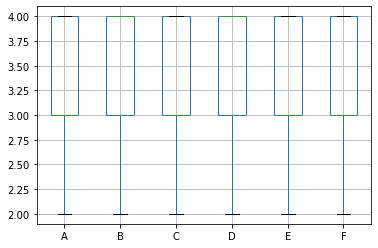

In [ ]:
boxplot = dfc.boxplot()
boxplot.plot()
plt.xticks([1, 2, 3,4,5,6], ['A','B','C','D','E','F'])
plt.show()

<Figure size 3600x3600 with 0 Axes>

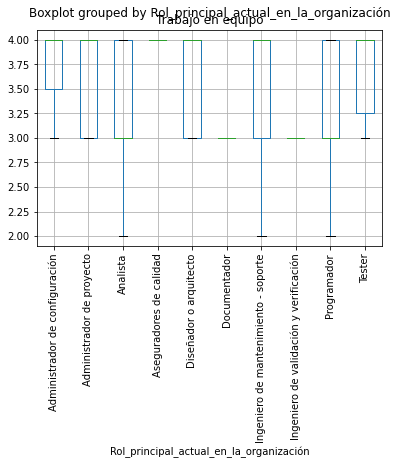

<Figure size 3600x3600 with 0 Axes>

In [ ]:
#Python
data.boxplot(column='Trabajo en equipo',by='Rol_principal_actual_en_la_organización')
plt.xticks(rotation=90)
plt.figure(figsize=(50,50))

In [ ]:
import plotly.express as px

In [ ]:
fig = px.parallel_categories(data, dimensions=['Rol_principal_actual_en_la_organización', 'Modalidad_de_trabajo','Años_de_experiencia_en_desarrollo_de_software','Considera_usted_que_es_feliz_en_su_trabajo','Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como','Género'],
                color="Edad_en_años", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Rol_principal_actual_en_la_organización':'Rol', 'Modalidad_de_trabajo':'Modalidad de trabajo','Años_de_experiencia_en_desarrollo_de_software':'Experiencia','Considera_usted_que_es_feliz_en_su_trabajo':'Felicidad','Considera_usted_que_los_proyectos_de_software_en_los_que_ha_participado_han_culminado_como':'Caos','Género':'Género'})

In [ ]:
fig.show()

Análisis de dimensiones

In [ ]:
ndata =  [data['Rol_principal_actual_en_la_organización']
		,data['Trabajo en equipo']
		,data['Comunicación']
		,data['Igualdad']
		,data['Condición física']
		,data['Liderazgo']
		,data['Motivación']]


In [ ]:
dfrolxdim = pd.DataFrame(ndata)
dfa = dfrolxdim.transpose( )

In [ ]:
dfa.head()

Rol_principal_actual_en_la_organización Trabajo en equipo Comunicación  \
0                  Diseñador o arquitecto                 3            2   
1                                Analista                 3            3   
2                            Documentador                 3            3   
3               Administrador de proyecto                 4            3   
4                             Programador                 3            3   

  Igualdad Condición física Liderazgo Motivación  
0        3                3         3          3  
1        3                3         3          3  
2        3                3         3          3  
3        4                4         3          4  
4        4                4         4          4

In [ ]:
dfa.groupby(by = 'Rol_principal_actual_en_la_organización').mean()
dfplot =dfa.groupby(by = 'Rol_principal_actual_en_la_organización').mean()

In [ ]:
dfplot

Trabajo en equipo  Comunicación  \
Rol_principal_actual_en_la_organización                                    
Administrador de configuración                    3.666667      3.666667   
Administrador de proyecto                         3.533333      3.400000   
Analista                                          3.285714      3.285714   
Aseguradores de calidad                           4.000000      4.000000   
Diseñador o arquitecto                            3.629630      3.370370   
Documentador                                      3.000000      3.000000   
Ingeniero de mantenimiento - soporte              3.461538      3.076923   
Ingeniero de validación y verificación            3.000000      3.000000   
Programador                                       3.407407      3.222222   
Tester                                            3.666667      3.333333   

                                         Igualdad  Condición física  \
Rol_principal_actual_en_la_organización                               
Administrador de configuración           3.666667          3.666667   
Administrador de proyecto                3.366667          3.633333   
Analista                                 3.214286          3.428571   
Aseguradores de calidad                  3.000000          4.000000   
Diseñador o arquitecto                   3.592593          3.518519   
Documentador                             3.000000          3.000000   
Ingeniero de mantenimiento - soporte     3.230769          3.000000   
Ingeniero de validación y verificación   3.500000          3.500000   
Programador                              3.296296          3.518519   
Tester                                   3.666667          3.500000   

                                         Liderazgo  Motivación  
Rol_principal_actual_en_la_organización                         
Administrador de configuración            3.000000    3.666667  
Administrador de proyecto                 3.366667    3.633333  
Analista                                  3.285714    3.000000  
Aseguradores de calidad                   3.000000    4.000000  
Diseñador o arquitecto                    3.481481    3.481481  
Documentador                              3.000000    3.000000  
Ingeniero de mantenimiento - soporte      3.000000    3.000000  
Ingeniero de validación y verificación    3.000000    3.000000  
Programador                               3.185185    3.296296  
Tester                                    3.500000    3.500000